Scraping

In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
from bs4 import BeautifulSoup
import requests

num_of_anime = 4000
anime_url_dict = {}
list_of_items = []
for anime_top in range(0,num_of_anime,50):

    url1 = f"https://myanimelist.net/topanime.php?type=tv&limit={anime_top}"
    user_agent = {'User-agent': 'Mozilla/5.0'}


    response1 = requests.get(url1, headers=user_agent)
    soup = BeautifulSoup(response1.content, "html.parser")
    show = soup.findAll("a", class_="hoverinfo_trigger fl-l ml12 mr8")
    for anime in show:
        url_of_anime = anime["href"]
        anime_page = requests.get(url_of_anime,headers=user_agent)
        soup5 = BeautifulSoup(anime_page.content, "html.parser")
        all_space_it = soup5.findAll("div" , class_="spaceit_pad")
        for line in all_space_it:
          text = line.text
          if len(text.split(":")) > 1 :
            element = text.split(":")[1].strip()
            componet = text.split(":")[0].strip()
            list_of_items.append(f"{componet}:{element}")

        anime_url_dict[url_of_anime] = list_of_items
        list_of_items = []


In [ ]:
new_dict = {}
for anime , list_of_elements in anime_url_dict.items():
  anime_name = anime.split("/")[-1]
  new_dict[anime_name] = {}
  for element in list_of_elements:
    elem_col = element.split(":")[0]
    elem_info = element.split(":")[1]
    new_dict[anime_name][elem_col] = elem_info


Saving to csv file because the scraping takes around 4 hours

In [ ]:
df = pd.DataFrame.from_dict(new_dict, orient='columns')
df = df.transpose()
df.to_csv("myanimelist.csv")

let's read it

In [ ]:

df = pd.read_csv("myanimelist.csv",index_col=0)


In [ ]:
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns
count_row * count_col #amount of cells 

115507

Let's see some basic stats of the data 

In [ ]:
df.head()

,Synonyms,Japanese,English,French,Type,Episodes,Status,Aired,Premiered,Broadcast,...,Score,Ranked,Popularity,Members,Favorites,German,Spanish,Themes,Genre,Demographics
Fullmetal_Alchemist__Brotherhood,Hagane no Renkinjutsushi,鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist,Fullmetal Alchemist Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17,...,"9.141 (scored by 18474871,847,487 users)\n ...",#12\n\n2\n based on the top anime page. Ple...,#3,"2,899,539","202,654",NaN,NaN,NaN,NaN,NaN
Gintama°,Gintama' (2015),銀魂°,Gintama Season 4,Gintama Saison 4,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18,...,"9.081 (scored by 215402215,402 users)\n \...",#22\n\n2\n based on the top anime page. Ple...,#335,"538,405","14,450",Gintama Season 4,Gintama Temporada 4,"Gag HumorGag Humor, HistoricalHistoric...",NaN,NaN
Steins_Gate,NaN,STEINS;GATE,Steins;Gate,NaN,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02,...,"9.081 (scored by 12408041,240,804 users)\n ...",#32\n\n2\n based on the top anime page. Ple...,#13,"2,249,653","171,688",NaN,NaN,"PsychologicalPsychological, Time Trave...",NaN,NaN
Shingeki_no_Kyojin_Season_3_Part_2,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,L'Attaque des Titans Saison 3 Partie 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00,...,"9.071 (scored by 13090561,309,056 users)\n ...",#42\n\n2\n based on the top anime page. Ple...,#28,"1,854,072","51,354",Attack on Titan Staffel 3 Teil 2,Ataque a los Titanes Temporada 3 Parte 2,"GoreGore, MilitaryMilitary, Su...",NaN,NaN
Gintama,"Gin Tama, Silver Soul, Yorinuki Gintama-san",銀魂,Gintama,NaN,TV,201,Finished Airing,"Apr 4, 2006 to Mar 25, 2010",Spring 2006,Thursdays at 18,...,"8.951 (scored by 357864357,864 users)\n \...",#152\n\n2\n based on the top anime page. Pl...,#130,"947,722","54,730",NaN,NaN,"Gag HumorGag Humor, HistoricalHistoric...",NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3983 entries, Fullmetal_Alchemist__Brotherhood to Oretacha_Youkai_Ningen
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Synonyms      2602 non-null   object
 1   Japanese      3982 non-null   object
 2   English       2801 non-null   object
 3   French        1302 non-null   object
 4   Type          3983 non-null   object
 5   Episodes      3983 non-null   object
 6   Status        3983 non-null   object
 7   Aired         3983 non-null   object
 8   Premiered     3983 non-null   object
 9   Broadcast     3983 non-null   object
 10  Producers     3983 non-null   object
 11  Licensors     3983 non-null   object
 12  Studios       3983 non-null   object
 13  Source        3983 non-null   object
 14  Genres        3121 non-null   object
 15  Theme         1542 non-null   object
 16  Demographic   1751 non-null   object
 17  Duration      3983 non-null   object
 18  Rati

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Synonyms,Synonyms,34.672358
Japanese,Japanese,0.025107
English,English,29.676124
French,French,67.311072
Type,Type,0.000000
Episodes,Episodes,0.000000
Status,Status,0.000000
Aired,Aired,0.000000
Premiered,Premiered,0.000000
Broadcast,Broadcast,0.000000


We can see we some features that are missing data, also there are some features that do not help us predict wheter anime score is higher then 7.0 
#Japanese
just name of anime in japanese, doesn't give us any indecation wheter the anime score will be good 
#Demographics and demographic
even if we combine them we won't have enough to use them 
#English 
just name of anime in english
#French 
just name of anime in french
#Broadcast 
when the anime was broadcasted (no impact on the outcome)
#German 
just name of anime in german
#Spanish
just name of anime in spanish
#Synonyms
name of anime 
# Type 
type of anime will always be "TV"
# Status, Premiered
I don't think status, premiered will have any impact on the score (if the anime is aired or finished)


Let's try to maybe merge Genre and Genres , also the same for theme and themes.
And check the results

# Data cleaning

In [ ]:
df.drop(["Japanese", "Demographics" ,"English", "French" , "Broadcast", "German", "Spanish", "Theme", "Demographic", "Synonyms", "Type","Status", "Premiered", "Aired", "Genre"], axis=1, inplace=True)

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Episodes,Episodes,0.000000
Producers,Producers,0.000000
Licensors,Licensors,0.000000
Studios,Studios,0.000000
Source,Source,0.000000
Genres,Genres,21.641978
Duration,Duration,0.000000
Rating,Rating,0.000000
Score,Score,0.000000
Ranked,Ranked,0.000000


28% precent missing is too much , we will need to drop this column

In [ ]:
df.drop(["Themes", "Genres"], inplace=True, axis=1)

Clean up the score column (because we want to do binary classification

In [ ]:
df['Score'] = df['Score'].apply(lambda x: x.split("(")[0]).astype(float)

In [ ]:
def is_above_seven(row):
  if row["Score"] > 6.9:
    val = True
  else:
    val = False
  return val

In [ ]:
df['Score'] = df.apply(is_above_seven, axis=1)

#for producers 
and licensors we have a lot of componets , for this purpose we will only take the first value for each
#for popularity 
we will remove the # because we won't be able to use this with our models

In [ ]:
df['Producers'] = df['Producers'].apply(lambda x: x.split(",")[0])

In [ ]:
df['Licensors'] = df['Licensors'].apply(lambda x: x.split(",")[0])
df['Popularity'] = df['Popularity'].apply(lambda x: x.replace("#", ""))

In [ ]:
import re 
def get_num(row):
  line = row["Ranked"]
  num = re.findall(r'\d+', line)[0]
  return num
def get_num_rating(row):
  line = row["Rating"]
  if line.endswith("Mild Nudity"):
    return 18
  elif line.endswith("All Ages"):
    return "all"
  elif line.startswith("PG"):
    return 13
  elif line == "None":
    return "all"
  num = re.findall(r'\d+', line)[0]
  return num
def split_duration(row):
  line = row["Duration"]
  if line is None: 
      return "20"
  elif len(line.split()) >= 2:
    return line.split()[0]

  return line

In [ ]:
df['Ranked'] = df.apply(get_num, axis=1)

In [ ]:
df["Rating"] = df.apply(get_num_rating, axis = 1)

In [ ]:
df["Duration"] = df.apply(split_duration, axis =1)

In [ ]:
df.head()

,Episodes,Producers,Licensors,Studios,Source,Duration,Rating,Score,Ranked,Popularity,Members,Favorites
Fullmetal_Alchemist__Brotherhood,64,Aniplex,Funimation,Bones,Manga,24,17,True,12,3,"2,899,539","202,654"
Gintama°,51,TV Tokyo,Funimation,Bandai Namco Pictures,Manga,24,13,True,22,335,"538,405","14,450"
Steins_Gate,24,Frontier Works,Funimation,White Fox,Visual novel,24,13,True,32,13,"2,249,653","171,688"
Shingeki_no_Kyojin_Season_3_Part_2,10,Production I.G,Funimation,Wit Studio,Manga,23,17,True,42,28,"1,854,072","51,354"
Gintama,201,TV Tokyo,Sentai Filmworks,Sunrise,Manga,24,13,True,152,130,"947,722","54,730"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#EDA

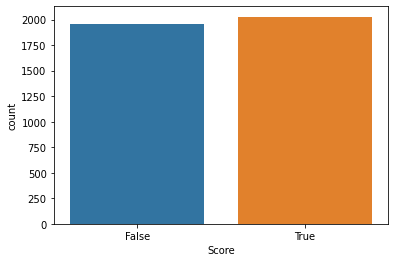

In [ ]:
sns.countplot(data=df, x="Score")

Score classes looks balanced so we don't need to worry

In [ ]:
(df.Episodes == 'Unknown').sum()

28

In [ ]:
df.Episodes.loc[df["Episodes"] == "Unknown"] = "99999"

In [ ]:
df.Episodes.median()

13.0

In [ ]:
df.Episodes.loc[df["Episodes"] == "99999"] = 13.0
df[['Episodes']] = df[['Episodes']].astype(int)


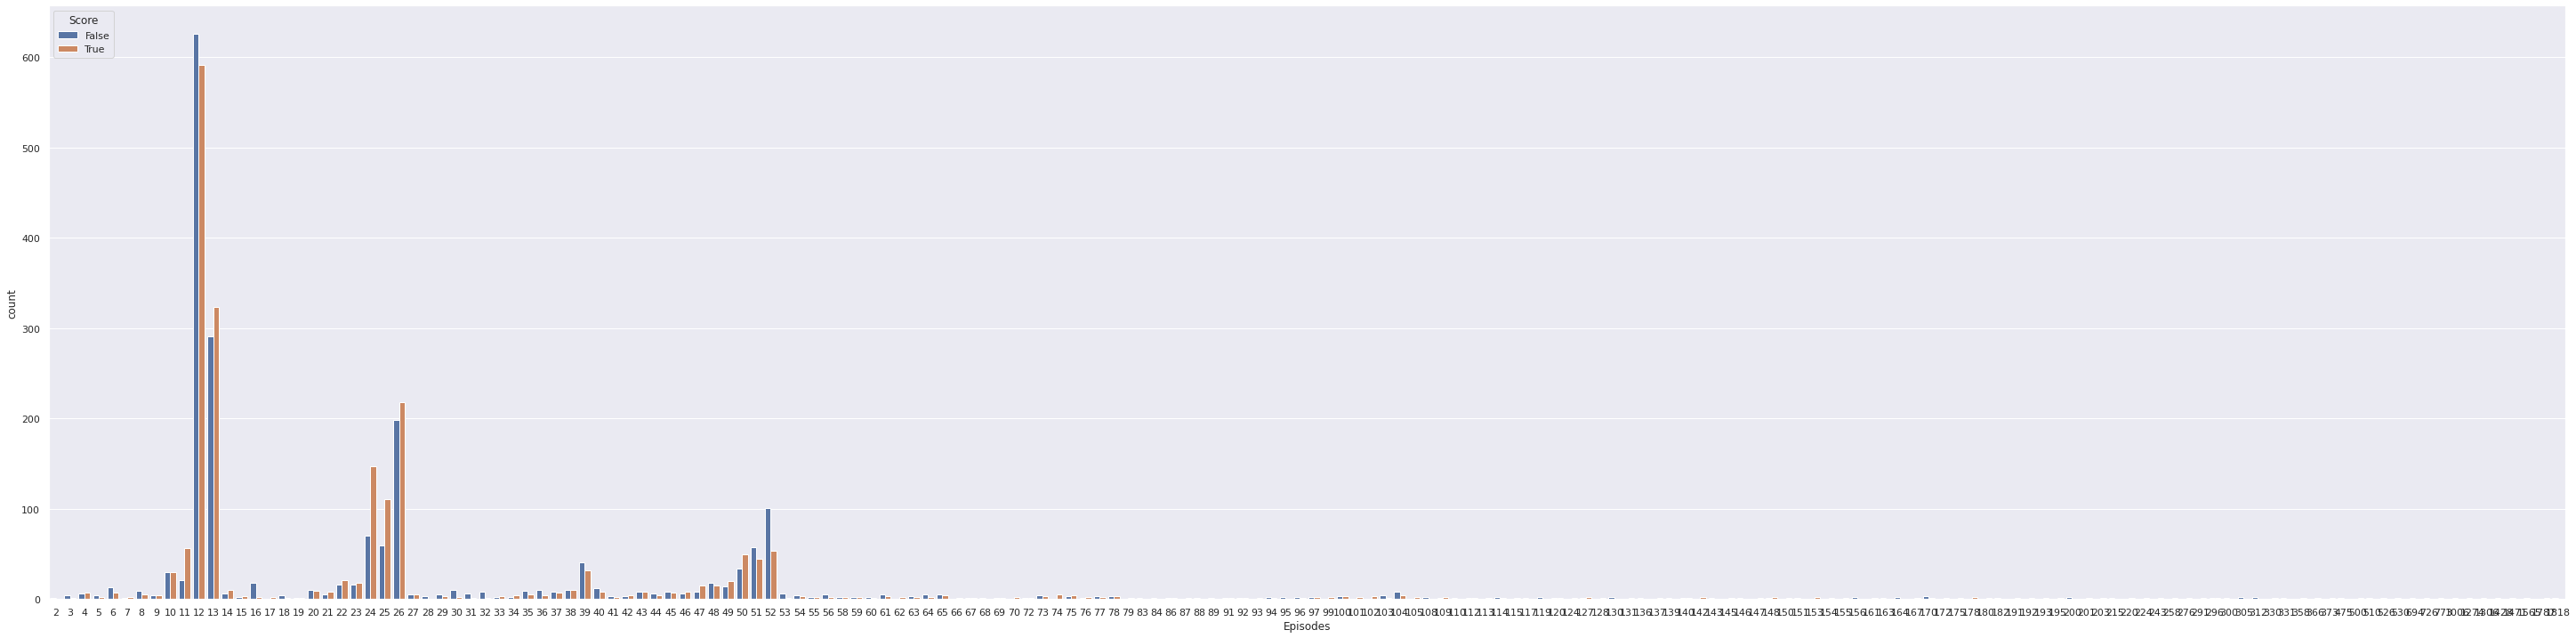

In [ ]:
sns.set(rc={'figure.figsize':(50.7,12.27)})

sns.countplot(data=df, x='Episodes', hue='Score')


this feature have a lot of labels, how ever it's seems this feature will give us overfit (because he is too close to what we want to predict), let's remove it . I don't think that this feature is giving us any indication about if the anime is good or not 

In [ ]:
df.drop("Episodes", inplace=True, axis=1)

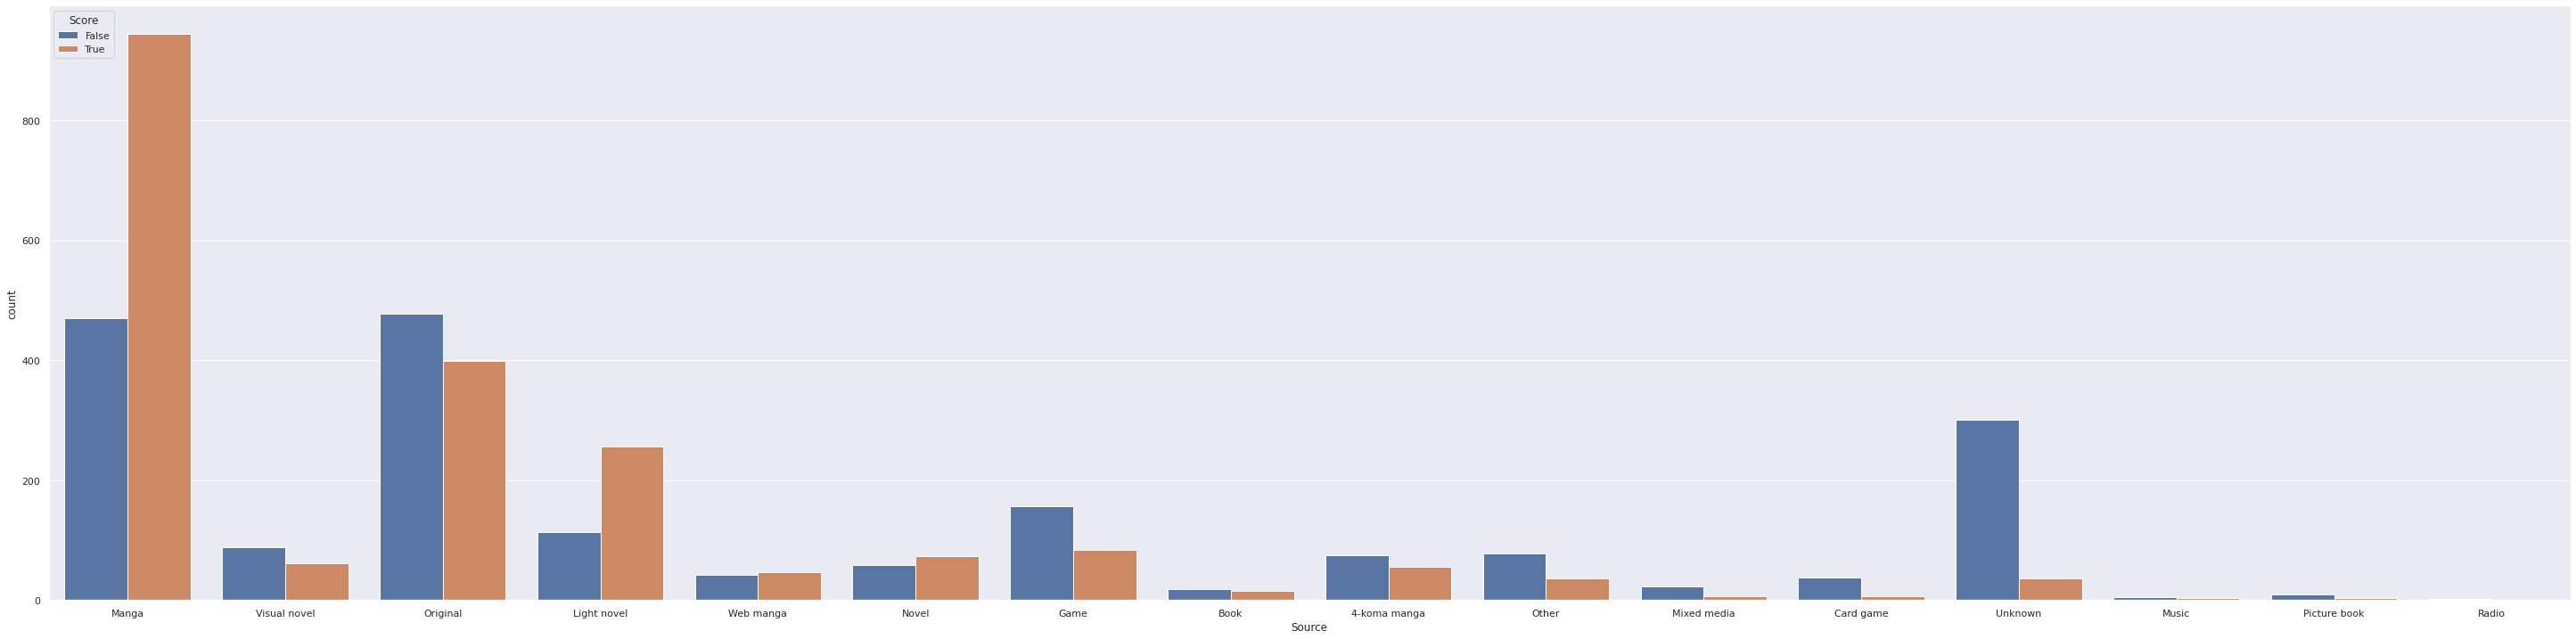

In [ ]:
sns.countplot(data=df, x='Source', hue='Score')


Seems the source is a good indication 

In [ ]:
df["Studios"].value_counts()

Toei Animation                                                          222
None found, add some                                                    201
Sunrise                                                                 164
J.C.Staff                                                               146
Studio Deen                                                             137
                                                                       ... 
Image Kei                                                                 1
Pierrot,       Studio Comet                                               1
Production I.G,       OLM,       Signal.MD                                1
Studio Comet,       Studio Sign                                           1
Kinema Citrus,       Ascension,       Creators in Pack,       Zero-G      1
Name: Studios, Length: 546, dtype: int64

In [ ]:
df['freq'] = df.groupby('Studios')['Studios'].transform('count')

We have many studio's that only had one project , we should label it as others

In [ ]:
def Studios(row):
  if row["freq"] <= 5  or str(row["Studios"]).__contains__("None"):
    return "Others"
  return row["Studios"]

In [ ]:
df["Studios"] = df.apply(Studios, axis = 1)

In [ ]:
df["Studios"].value_counts()

Others                        880
Toei Animation                222
Sunrise                       164
J.C.Staff                     146
Studio Deen                   137
                             ... 
Kachidoki Studio                7
Studio Gokumi,       AXsiZ      6
Platinum Vision                 6
NAZ                             6
Pine Jam                        6
Name: Studios, Length: 111, dtype: int64

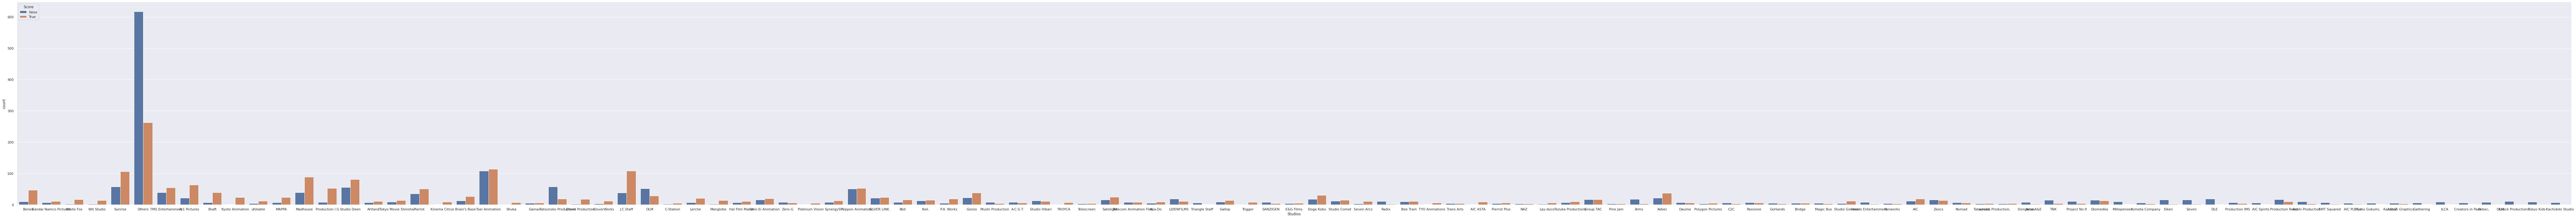

In [ ]:
sns.set(rc={'figure.figsize':(150.7,12.27)})

sns.countplot(data=df, x='Studios', hue='Score')


In [ ]:
df["Producers"].value_counts()

None found         666
TV Tokyo           370
Aniplex            261
Bandai Visual      150
Lantis             118
                  ... 
Frencel              1
APPP                 1
Studio Fantasia      1
Daiichikosho         1
Toranoana            1
Name: Producers, Length: 334, dtype: int64

In [ ]:
df['freq_producers'] = df.groupby('Producers')['Producers'].transform('count')

In [ ]:
def Producers(row):
  if row["freq_producers"] <= 4  or row["Producers"] == "None found":
    return "Others"
  return row["Producers"]

In [ ]:
df["Producers"] = df.apply(Producers, axis = 1)

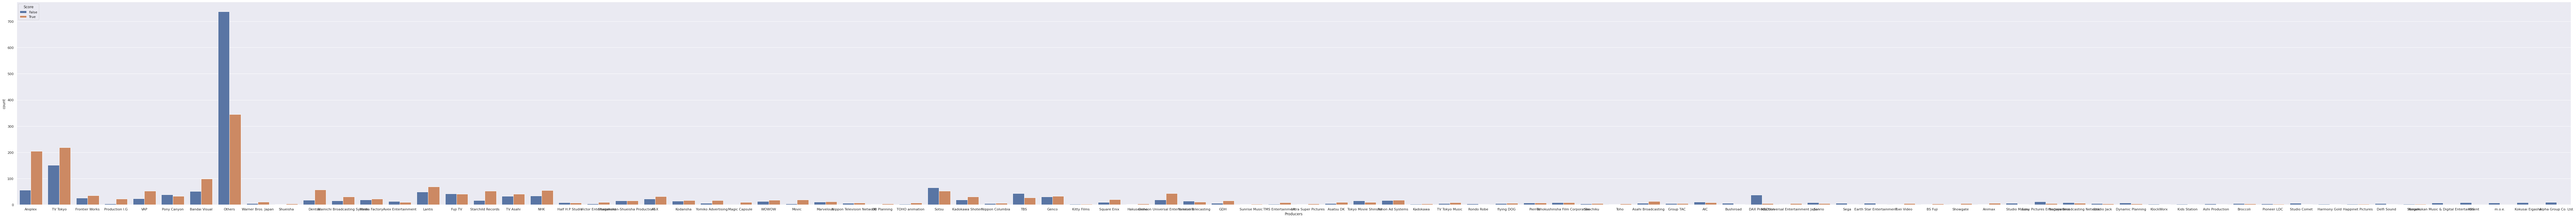

In [ ]:
sns.countplot(data=df, x='Producers', hue='Score')
sns.set(rc={'figure.figsize':(50.7,300.27)})



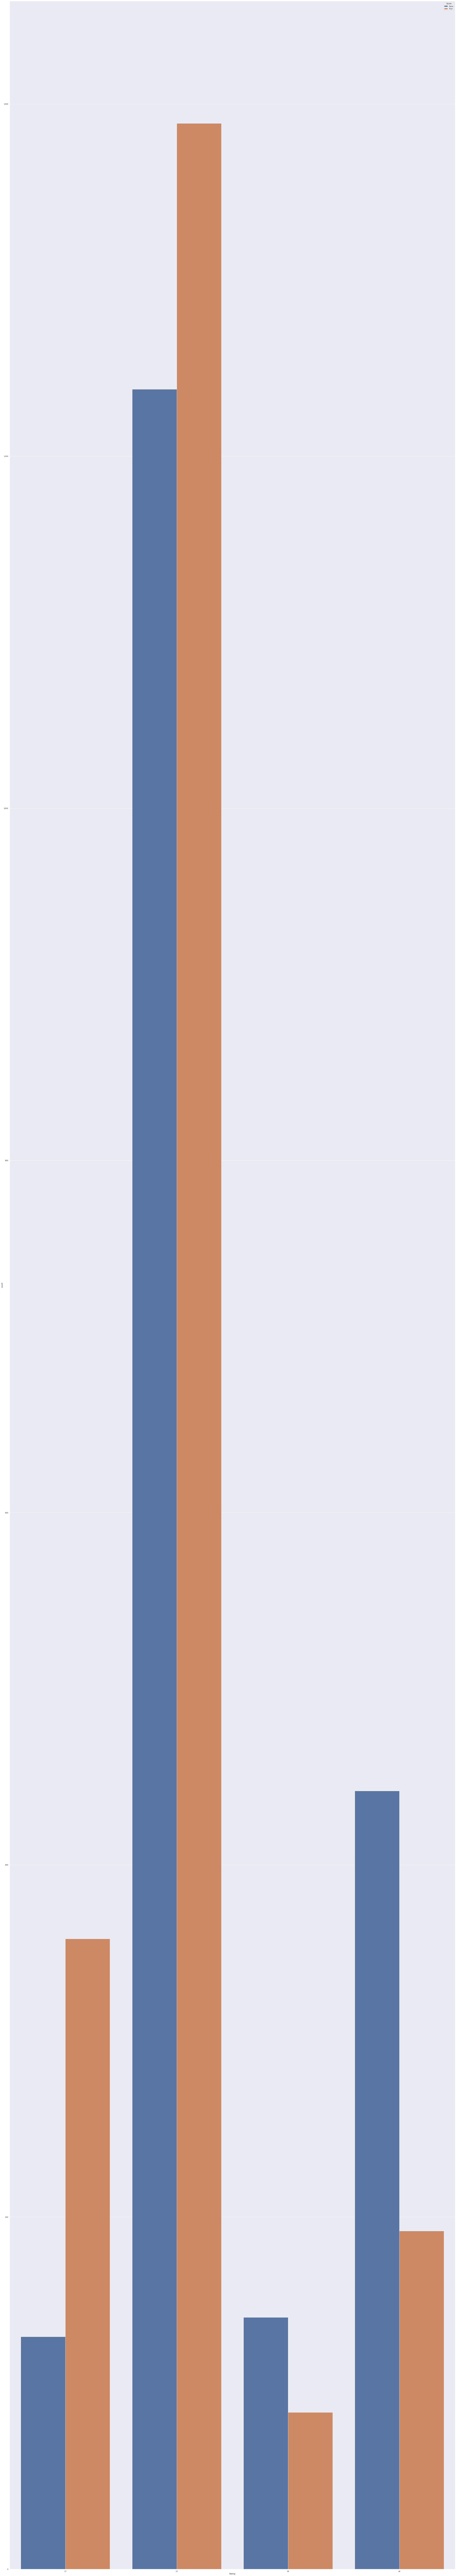

In [ ]:
df["Rating"].value_counts()
sns.countplot(data=df, x='Rating', hue='Score')
sns.set(rc={'figure.figsize':(9.7,12.27)})


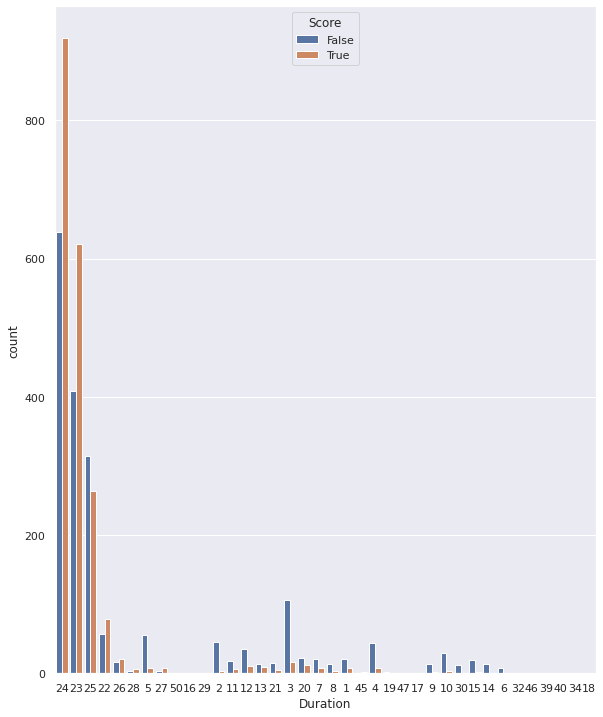

In [ ]:
sns.countplot(data=df, x='Duration', hue='Score')


#PREPROCESSING

In [ ]:
seperate_to_cols = ["Producers", "Licensors", "Studios", "Source", "Rating"]
df = pd.get_dummies(df, columns=seperate_to_cols)

Dropping the following values due to just be counting method 

In [ ]:
df.drop(["freq", "freq_producers"], inplace=True, axis=1)

In [ ]:
df['Members'] = df['Members'].apply(lambda x: x.replace(",", "")).astype(int)
df['Favorites'] = df['Favorites'].apply(lambda x: x.replace(",", "")).astype(int)

Dropping the following columns due to overfitting (noticed it in the feature importances)

In [ ]:
df.drop(["Ranked", "Duration"], axis=1, inplace=True)


In [ ]:
cols = []
for col in df.columns:
  if col != "Score":
    cols.append(col)
print(len(cols))

278


In [ ]:
count_row = df.shape[0]
count_row

3983

#Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression



X = df[cols]
y = df['Score'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# feature scaling
as we dont have negative values standardscaler would be the best scaler for us 

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#Baseline (Logisic Regression)

In [ ]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

print(logreg.score(X_train, y_train))
print('Logisic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

0.82015065913371
Logisic Regression Model accuracy score: 0.7867


#SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train, y_train)
 
# Mode performance
 
y_pred = svm.predict(X_test)
print(svm.score(X_train, y_train))

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

0.8148148148148148
Accuracy: 0.778


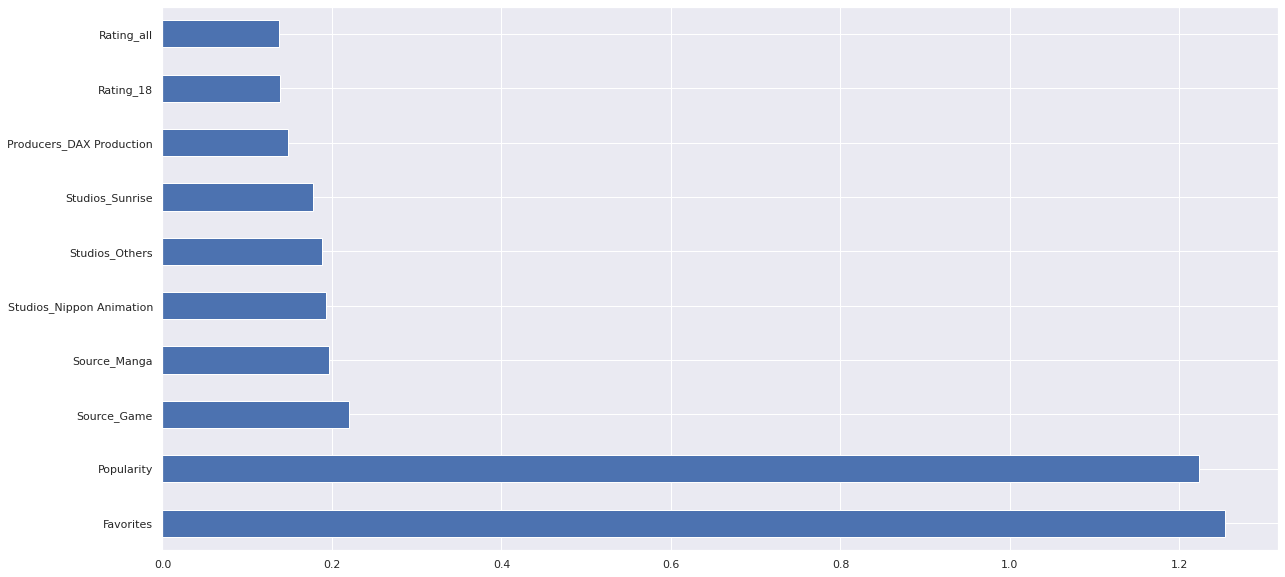

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

pd.Series(abs(svm.coef_[0]), index=cols).nlargest(10).plot(kind='barh')
# pd.Series(abs(svm.coef_[0]), index=cols).plot(kind='barh')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       399
           1       0.77      0.79      0.78       398

    accuracy                           0.78       797
   macro avg       0.78      0.78      0.78       797
weighted avg       0.78      0.78      0.78       797



In [ ]:
df.shape[0]

3983